<a href="https://colab.research.google.com/github/arthurvaz05/Anomalia_sequencia/blob/main/trab3_textmining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install WordCount

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd

In [12]:
import os

In [13]:
! ls drive/MyDrive/Text_mining

polarity_neg.csv  polarity_neg.neg  polarity_pos.csv  polarity_pos.pos	trab3_textmining.ipynb


In [14]:
os.chdir('drive/MyDrive/Text_mining/')

In [15]:
! ls

polarity_neg.csv  polarity_neg.neg  polarity_pos.csv  polarity_pos.pos	trab3_textmining.ipynb


In [46]:
pos = pd.read_csv('polarity_pos.csv', header=None, sep=';')
neg = pd.read_csv('polarity_neg.csv', header=None, sep=';')


In [47]:
pos.rename(columns={0: 'text'}, inplace=True)
neg.rename(columns={0: 'text'}, inplace=True)

In [48]:
pos = pos.assign(Sentimento = 1)
neg = neg.assign(Sentimento = 0)

In [49]:
#! python -m spacy download pt_core_news_sm

In [50]:
#! pip install spacy

In [51]:
import spacy
#portugues
#nlp = spacy.load("pt_core_news_sm")

#ingles
nlp = spacy.load("en_core_web_sm")


def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    tokens = [token for token in tokens if token.isalpha()]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

pos['text'] = pos['text'].apply(preprocess_text)
neg['text'] = neg['text'].apply(preprocess_text)


In [52]:
sentimento = pd.concat([neg,pos],ignore_index=True)

# PERGUNTA - A

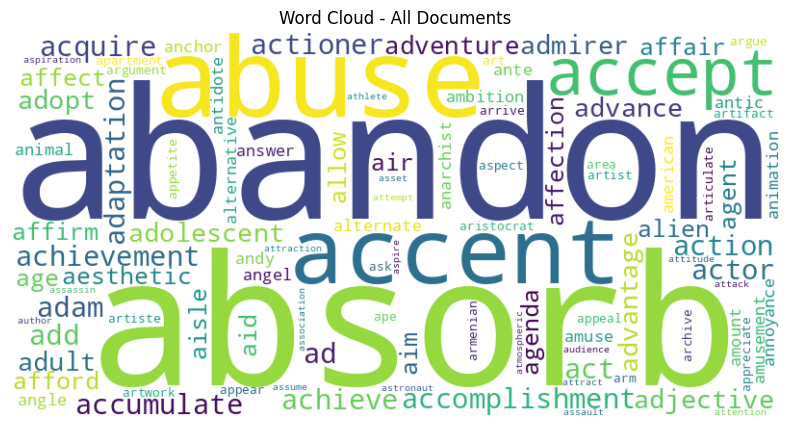

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()

text_counts = vectorizer.fit_transform(sentimento['text'])

wordcloud_text = " ".join(vectorizer.get_feature_names_out())

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - All Documents")
plt.show()


In [54]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


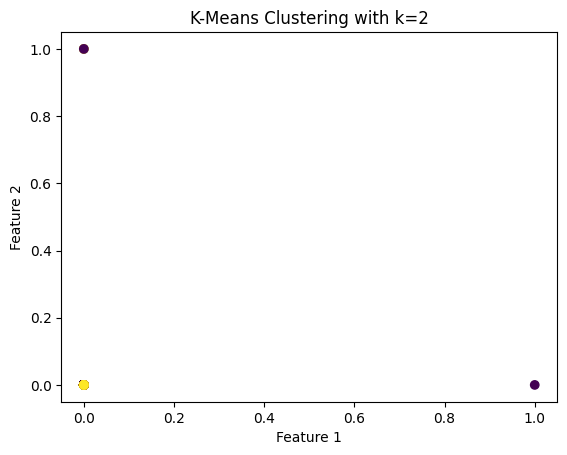

                                                    text  Sentimento  cluster
0                           simplistic silly and tedious           0        1
1      it so laddish and juvenile only teenage boys c...           0        1
2      exploitative and largely devoid of the depth o...           0        0
3      garbus discards the potential for pathological...           0        0
4      a visually flashy but narratively opaque and e...           0        1
...                                                  ...         ...      ...
10657  both exuberantly romantic and serenely melanch...           1        1
10658  mazel tov to a film about a family joyous life...           1        1
10659  standing in the shadows of motown is the best ...           1        0
10660  it nice to see piscopo again after all these y...           1        1
10661  provides a porthole into that noble trembling ...           1        1

[10662 rows x 3 columns]


In [55]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(text_counts)

sentimento['cluster'] = clusters

plt.scatter(text_counts.toarray()[:, 0], text_counts.toarray()[:, 1], c=clusters)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with k=2')
plt.show()

print(sentimento)

# PERGUNTA - B

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
from statistics import mean


X = sentimento['text']
y = sentimento['Sentimento']

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(X)

nb_classifier = MultinomialNB()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()

f1_scorer = make_scorer(f1_score, average='weighted')

nb_scores = cross_val_score(nb_classifier, X_tfidf, y, cv=5, scoring=f1_scorer)
knn_scores = cross_val_score(knn_classifier, X_tfidf, y, cv=5, scoring=f1_scorer)
svm_scores = cross_val_score(svm_classifier, X_tfidf, y, cv=5, scoring=f1_scorer)

avg_f1_nb = mean(nb_scores)
avg_f1_knn = mean(knn_scores)
avg_f1_svm = mean(svm_scores)

print(f'Média F1 (Naive Bayes): {avg_f1_nb}')
print(f'Média F1 (kNN): {avg_f1_knn}')
print(f'Média F1 (SVM): {avg_f1_svm}')


Média F1 (Naive Bayes): 0.7808859632984521
Média F1 (kNN): 0.7112670785539742
Média F1 (SVM): 0.7692182436167347


# PERGUNTA - C

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
# Divida os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialize o vetorizador TF
tf_vectorizer = CountVectorizer()

# Vetorize os dados de texto
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

# Inicialize o classificador kNN
knn_classifier = KNeighborsClassifier()

# Treine o classificador kNN com os dados de treino
knn_classifier.fit(X_train_tf, y_train)

# Faça previsões nos dados de teste
y_pred = knn_classifier.predict(X_test_tf)

# Calcule a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)

# Imprima a matriz de confusão
print("Matriz de Confusão:")
print(confusion)

# Calcule e imprima revocação, precisão e F1
report = classification_report(y_test, y_pred)
print("\nRelatório de Classificação:")
print(report)

Matriz de Confusão:
[[683 379]
 [480 591]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.59      0.64      0.61      1062
           1       0.61      0.55      0.58      1071

    accuracy                           0.60      2133
   macro avg       0.60      0.60      0.60      2133
weighted avg       0.60      0.60      0.60      2133

